In [1]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
import cPickle as pickle
from sklearn.metrics import precision_recall_curve, roc_curve

In [3]:
# load dojo data
with open('/home/d/GPSTUDY/gp_y_test_proba_dojo.p', 'rb') as f:
    gp_y_test_proba_dojo = pickle.load(f)
with open('/home/d/GPSTUDY/fp_y_test_proba_dojo.p', 'rb') as f:
    fp_y_test_proba_dojo = pickle.load(f)
with open('/home/d/GPSTUDY/gt_y_test_dojo.p', 'rb') as f:
    gt_y_test_dojo = pickle.load(f)

In [4]:
# load cyl data
with open('/home/d/GPSTUDY/gp_y_test_proba_cyl.p', 'rb') as f:
    gp_y_test_proba_cyl = pickle.load(f)
with open('/home/d/GPSTUDY/fp_y_test_proba_cyl.p', 'rb') as f:
    fp_y_test_proba_cyl = pickle.load(f)
with open('/home/d/GPSTUDY/gt_y_test_cyl.p', 'rb') as f:
    gt_y_test_cyl = pickle.load(f)

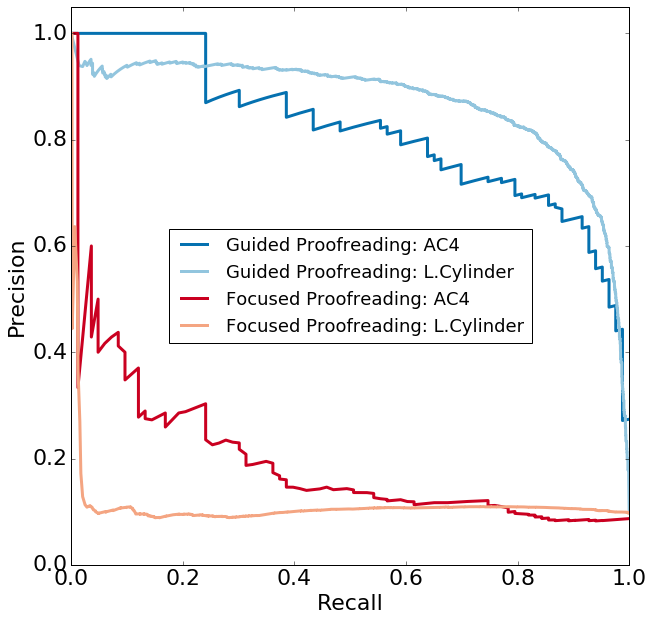

In [50]:
gp_precision_dojo, gp_recall_dojo, gp_thresholds_dojo = precision_recall_curve(gt_y_test_dojo, 
                                                                               gp_y_test_proba_dojo, 
                                                                               pos_label=1)
fp_precision_dojo, fp_recall_dojo, fp_thresholds_dojo = precision_recall_curve(gt_y_test_dojo, 
                                                                               fp_y_test_proba_dojo, 
                                                                               pos_label=1)
gp_precision_cyl, gp_recall_cyl, gp_thresholds_cyl = precision_recall_curve(gt_y_test_cyl, 
                                                                               gp_y_test_proba_cyl, 
                                                                               pos_label=1)
fp_precision_cyl, fp_recall_cyl, fp_thresholds_cyl = precision_recall_curve(gt_y_test_cyl, 
                                                                               fp_y_test_proba_cyl, 
                                                                               pos_label=1)
fig = plt.figure(figsize=(10,10))
plt.plot(gp_recall_dojo, gp_precision_dojo, color='#0571b0', label='Guided Proofreading: AC4', linewidth=3)
plt.plot(gp_recall_cyl, gp_precision_cyl, color='#92c5de', label='Guided Proofreading: L.Cylinder', linewidth=3)
plt.plot(fp_recall_dojo, fp_precision_dojo, color='#ca0020', label='Focused Proofreading: AC4', linewidth=3)
plt.plot(fp_recall_cyl, fp_precision_cyl, color='#f4a582', label='Focused Proofreading: L.Cylinder', linewidth=3)
# plt.plot(gp_recall_cyl, gp_precision_cyl, color='turquoise', label='GP L.Cylinder', linewidth=3)
# plt.plot(fp_recall_cyl, fp_precision_cyl, color='gold', label='FP L.Cylinder', linewidth=3)
# plt.plot(gp_recall_dojo, gp_precision_dojo, color='teal', label='GP AC4', linewidth=4)
# plt.plot(fp_recall_dojo, fp_precision_dojo, color='orange', label='FP AC4', linewidth=4)

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.00])

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
plt.rc('legend',**{'fontsize':18})

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend( loc='center')
plt.savefig('/home/d/PAPERGFX/precisionrecall.pdf', bbox_inches='tight')

array([  3.21408087e-27,   1.43625925e-06,   1.53833969e-06, ...,
         9.99999762e-01,   9.99999881e-01,   1.00000000e+00])

In [31]:
len(gt_y_test_dojo)

3820

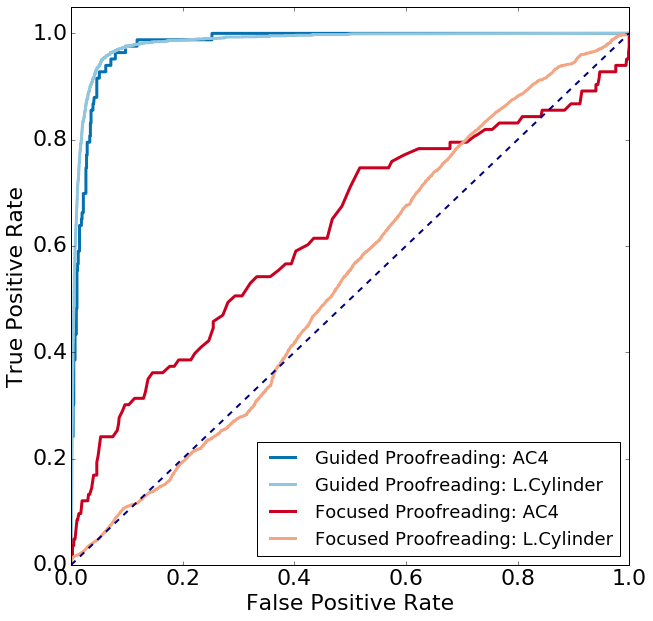

In [59]:
gp_fpr_dojo, gp_tpr_dojo, gp_thresholds_dojo = roc_curve(gt_y_test_dojo, 
                                                                               gp_y_test_proba_dojo, 
                                                                               pos_label=1)
fp_fpr_dojo, fp_tpr_dojo, fp_thresholds_dojo = roc_curve(gt_y_test_dojo, 
                                                                               fp_y_test_proba_dojo, 
                                                                               pos_label=1)
gp_fpr_cyl, gp_tpr_cyl, gp_thresholds_cyl = roc_curve(gt_y_test_cyl, 
                                                                               gp_y_test_proba_cyl, 
                                                                               pos_label=1)
fp_fpr_cyl, fp_tpr_cyl, fp_thresholds_cyl = roc_curve(gt_y_test_cyl, 
                                                                               fp_y_test_proba_cyl, 
                                                                               pos_label=1)
fig = plt.figure(figsize=(10,10))
plt.plot(gp_fpr_dojo, gp_tpr_dojo, color='#0571b0', label='Guided Proofreading: AC4', linewidth=3)
plt.plot(gp_fpr_cyl, gp_tpr_cyl, color='#92c5de', label='Guided Proofreading: L.Cylinder', linewidth=3)
plt.plot(fp_fpr_dojo, fp_tpr_dojo, color='#ca0020', label='Focused Proofreading: AC4', linewidth=3)
plt.plot(fp_fpr_cyl, fp_tpr_cyl, color='#f4a582', label='Focused Proofreading: L.Cylinder', linewidth=3)
# plt.plot(gp_recall_cyl, gp_precision_cyl, color='turquoise', label='GP L.Cylinder', linewidth=3)
# plt.plot(fp_recall_cyl, fp_precision_cyl, color='gold', label='FP L.Cylinder', linewidth=3)
# plt.plot(gp_recall_dojo, gp_precision_dojo, color='teal', label='GP AC4', linewidth=4)
# plt.plot(fp_recall_dojo, fp_precision_dojo, color='orange', label='FP AC4', linewidth=4)

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.00])

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
plt.rc('legend',**{'fontsize':18})

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend( loc='lower right')
plt.savefig('/home/d/PAPERGFX/roc.pdf', bbox_inches='tight')